#### Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df_1 = pd.read_csv('Bank_Churn_Messy.xlsx - Account_Info.csv')
df_2 = pd.read_csv('Bank_Churn_Messy.xlsx - Customer_Info.csv')

In [4]:
df_1.head()


,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,0.00,1,1,2,Yes,1
1,15647311,83807.86,1,1,1,Yes,0
2,15619304,159660.80,3,0,8,No,1
3,15701354,0.00,2,0,1,No,0
4,15737888,125510.82,1,1,2,Yes,0


In [4]:
merged_df = pd.merge(df_1, df_2, on='CustomerId', how='outer')

In [ ]:
merged_df.head()

In [5]:
merged_df=merged_df.drop("Tenure_y",axis=1)

In [6]:
merged_df=merged_df.rename(columns={"Tenure_x":"Tenure"})

In [7]:
merged_df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15565701,161993.89,1,0,9,No,0,Ferri,698,Spain,Female,39.0,"902,12.38"
1,15565706,0.00,1,1,1,Yes,1,Akobundu,612,Spain,Male,35.0,"832,56.26"
2,15565714,64430.06,2,1,1,Yes,0,Cattaneo,601,France,Male,47.0,"965,17.97"
3,15565779,57809.32,1,0,6,No,0,Kent,627,Germany,Female,30.0,188258.49
4,15565796,96048.55,1,0,10,No,0,Docherty,745,Germany,Male,48.0,"745,10.65"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15815628,113899.92,1,0,8,No,0,Moysey,711,France,Female,37.0,"802,15.2"
9997,15815645,152303.66,2,1,8,Yes,0,Akhtar,481,France,Male,37.0,175082.20
9998,15815656,100116.67,1,1,9,Yes,1,Hopkins,541,Germany,Female,39.0,199808.10
9999,15815660,154139.45,1,1,1,Yes,0,Mazzi,758,France,Female,34.0,"607,28.89"


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Balance          10001 non-null  float64
 2   NumOfProducts    10001 non-null  int64  
 3   HasCrCard        10001 non-null  int64  
 4   Tenure           10001 non-null  int64  
 5   IsActiveMember   10001 non-null  object 
 6   Exited           10001 non-null  int64  
 7   Surname          10001 non-null  object 
 8   CreditScore      10001 non-null  int64  
 9   Geography        10001 non-null  object 
 10  Gender           10001 non-null  object 
 11  Age              9998 non-null   float64
 12  EstimatedSalary  10001 non-null  object 
dtypes: float64(2), int64(6), object(5)
memory usage: 1015.9+ KB


In [10]:
measures = [i for i in merged_df.select_dtypes(include=['int64','float64']). columns]
dimension = [i for i in merged_df.select_dtypes(include=['object']).columns]

In [11]:
measures

['CustomerId',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'Tenure',
 'Exited',
 'CreditScore',
 'Age']

In [12]:
dimension

['IsActiveMember', 'Surname', 'Geography', 'Gender', 'EstimatedSalary']

### Analysis

#### Question 1

###### How many customers do each country have?

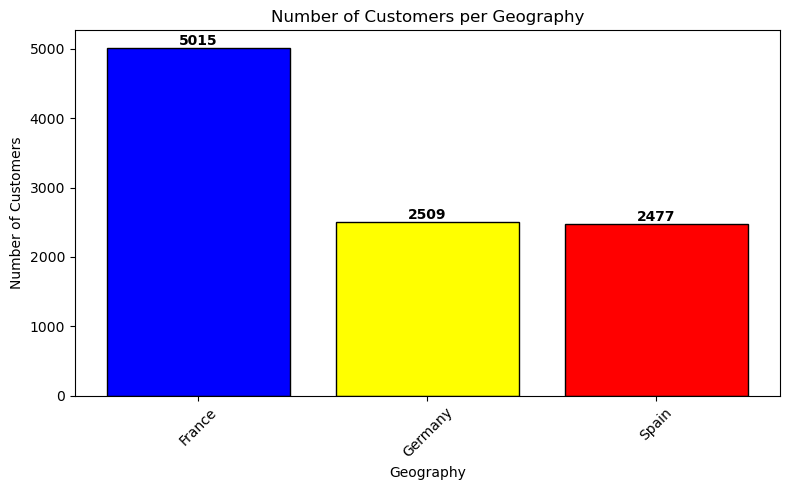

In [13]:
# Group by 'Geography' and count 'CustomerId'
geo_counts = merged_df.groupby('Geography')['CustomerId'].count()

colors=['blue','yellow','red']

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(geo_counts.index, geo_counts.values, color=colors, edgecolor='black')

# Adding labels and title
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Geography')
plt.xticks(rotation=45)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


###### What is the tally of Female and Male customers?

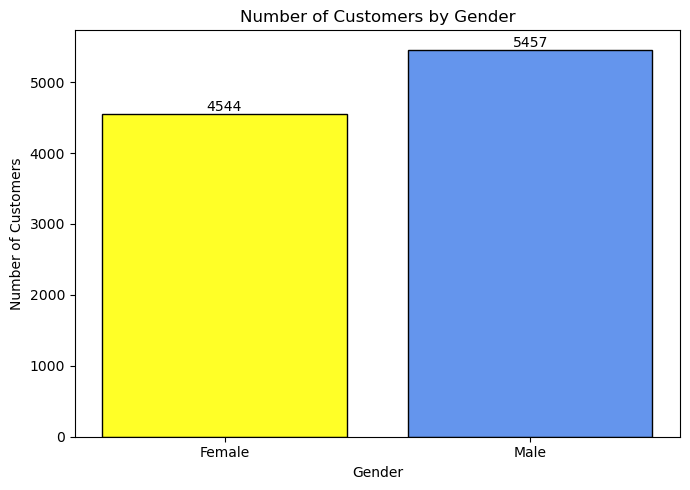

In [5]:

# Group by 'Gender' and count 'CustomerId'
gender_counts = merged_df.groupby('Gender')['CustomerId'].count()

colors = ['#FFFF27', '#6495ED']  # Yellow and cornflower blue

# Plotting the bar chart
plt.figure(figsize=(7, 5))
bars = plt.bar(gender_counts.index, gender_counts.values, color=colors, edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, int(yval), 
             ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Gender')
plt.tight_layout()
plt.show()


##### Average Credit Score by country?

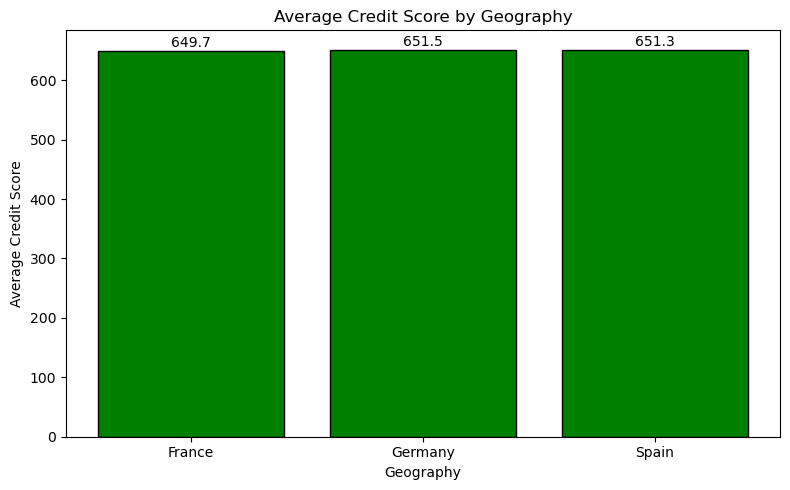

In [65]:
# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_credit_score.index, avg_credit_score.values, color='green', edgecolor='black')

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, round(yval, 1), ha='center', va='bottom')

# Labels and title
plt.title('Average Credit Score by Geography')
plt.xlabel('Geography')
plt.ylabel('Average Credit Score')
plt.tight_layout()
plt.show()


In [13]:
## categorize tenure

def categorize_tenure(value):
    if value <=2:
        return 'Short-termed'
    elif value > 2 and value <=6:
        return 'mid-termed'
    else:
        return 'long-termed'
          
merged_df['Tenure Category'] = merged_df['Tenure'].apply(categorize_tenure)

In [14]:
merged_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Tenure Category
0,15565701,161993.89,1,0,9,No,0,Ferri,698,Spain,Female,39.0,"902,12.38",long-termed
1,15565706,0.00,1,1,1,Yes,1,Akobundu,612,Spain,Male,35.0,"832,56.26",Short-termed
2,15565714,64430.06,2,1,1,Yes,0,Cattaneo,601,France,Male,47.0,"965,17.97",Short-termed
3,15565779,57809.32,1,0,6,No,0,Kent,627,Germany,Female,30.0,188258.49,mid-termed
4,15565796,96048.55,1,0,10,No,0,Docherty,745,Germany,Male,48.0,"745,10.65",long-termed


###### Tenure for each customer has been Categorized in which 0-2 years is Short term, 3-6 years is Mid-term , >6years is considered long term 

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Balance          10001 non-null  float64
 2   NumOfProducts    10001 non-null  int64  
 3   HasCrCard        10001 non-null  int64  
 4   Tenure_x         10001 non-null  int64  
 5   IsActiveMember   10001 non-null  object 
 6   Exited           10001 non-null  int64  
 7   Surname          10001 non-null  object 
 8   CreditScore      10001 non-null  int64  
 9   Geography        10001 non-null  object 
 10  Gender           10001 non-null  object 
 11  Age              9998 non-null   float64
 12  Tenure_y         10001 non-null  int64  
 13  EstimatedSalary  10001 non-null  object 
dtypes: float64(2), int64(7), object(5)
memory usage: 1.1+ MB


##### What is Average mode of the product Per Tenure Category?

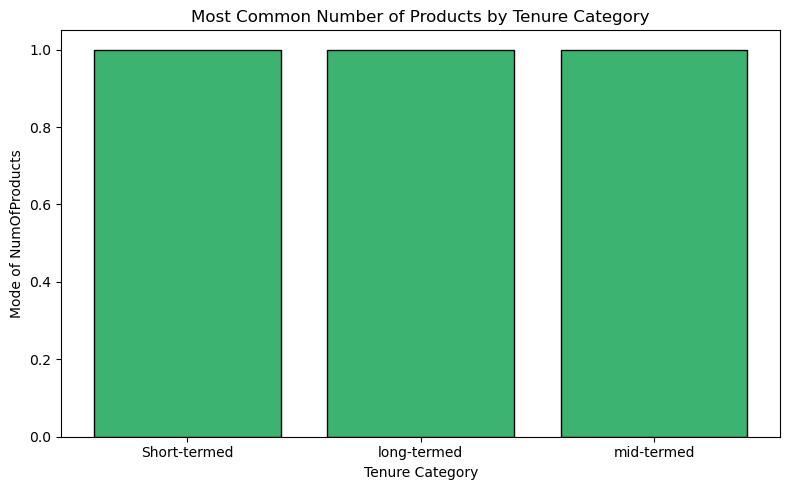

In [16]:
# Group by 'Tenure Category' and get mode of 'NumOfProducts'
mode_num_products = merged_df.groupby('Tenure Category')['NumOfProducts'].agg(lambda x: x.mode().iloc[0])
# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(mode_num_products.index, mode_num_products.values, color='mediumseagreen', edgecolor='black')
plt.title('Most Common Number of Products by Tenure Category')
plt.xlabel('Tenure Category')
plt.ylabel('Mode of NumOfProducts')
plt.tight_layout()
plt.show()


In [14]:
# Select relevant columns
top_5_salaries = merged_df[['CustomerId', 'Surname', 'EstimatedSalary' , 'Geography']]

# Sort by salary in descending order and take top 5
top_5_salaries = top_5_salaries.sort_values(by='EstimatedSalary', ascending=False).head(5)


In [15]:
top_5_salaries

,CustomerId,Surname,EstimatedSalary,Geography
6533,15728693,Unknown_1,9999999.00,Germany
7640,15756954,Unknown_3,9999999.00,France
557,15580203,Unknown_2,9999999.00,Spain
1250,15597394,Rhodes,"999,84.86",Spain
1159,15595010,Huang,"999,24.04",Spain


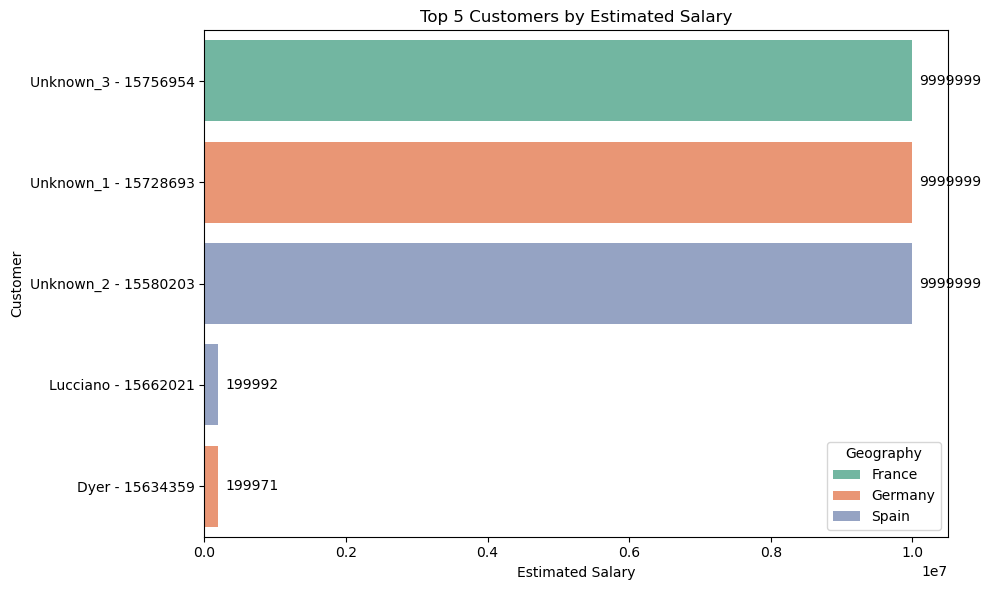

In [27]:
# Convert salary to numeric (if not already)
merged_df['EstimatedSalary'] = pd.to_numeric(merged_df['EstimatedSalary'], errors='coerce')

# Top 5 customers by salary
top5 = merged_df[['CustomerId', 'Surname', 'EstimatedSalary', 'Geography']].sort_values(
    by='EstimatedSalary', ascending=False).head(5)

# Combine surname and ID for better labeling
top5['Customer'] = top5['Surname'] + ' - ' + top5['CustomerId'].astype(str)

# Plot
plt.figure(figsize=(10, 6))
ax = sb.barplot(data=top5, x='EstimatedSalary', y='Customer', hue='Geography', dodge=False, palette='Set2')

# Add data labels at the end of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=5)

# Customize chart
plt.title('Top 5 Customers by Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Customer')
plt.legend(title='Geography', loc='lower right')
plt.tight_layout()
plt.show()


In [11]:
selected_columns = merged_df[['Surname','Balance','Geography','Tenure Category','Tenure','CreditScore','IsActiveMember']]
top_25_Tenure = selected_columns.sort_values(by='Tenure', ascending=False).groupby('Tenure Category').head(10)


In [12]:
top_25_Tenure

,Surname,Balance,Geography,Tenure Category,Tenure,CreditScore,IsActiveMember
1278,Clements,0.00,France,long-termed,10,654,No
4251,McIntyre,102185.42,Germany,long-termed,10,717,No
2383,Gray,128039.01,Spain,long-termed,10,682,Yes
8358,West,118588.83,Germany,long-termed,10,692,Yes
4305,Hou,0.00,France,long-termed,10,626,No
4290,Chen,112536.57,France,long-termed,10,666,Yes
4284,Yin,145988.65,France,long-termed,10,787,Yes
2404,George,103121.33,Spain,long-termed,10,714,Yes
7087,Hamilton,144684.03,France,long-termed,10,694,Yes
2439,Hsu,0.00,Spain,long-termed,10,508,Yes


In [15]:
selected_columns = merged_df[['Surname','Balance','Geography','Tenure Category','Tenure','CreditScore','IsActiveMember','Exited']]
top_25_Balance = selected_columns.sort_values(by='Balance', ascending=False).groupby('Tenure Category').head(10)

In [16]:
top_25_Balance

,Surname,Balance,Geography,Tenure Category,Tenure,CreditScore,IsActiveMember,Exited
7650,Lo,250898.09,Spain,mid-termed,3,655,Yes,1
5996,To Rot,238387.56,France,mid-termed,3,583,Yes,1
5942,Haddon,222267.63,Spain,long-termed,9,749,No,1
239,McIntosh,221532.80,Spain,mid-termed,3,489,No,0
805,Shaw,216109.88,Spain,mid-termed,5,663,Yes,1
1319,Dilke,214346.96,Germany,mid-termed,4,650,No,0
1131,Chia,213146.20,Spain,Short-termed,2,584,No,1
8155,Moore,212778.20,France,mid-termed,3,850,Yes,0
2138,Thomson,212696.32,Germany,mid-termed,3,634,No,0
8594,Mao,212692.97,France,mid-termed,4,592,No,0


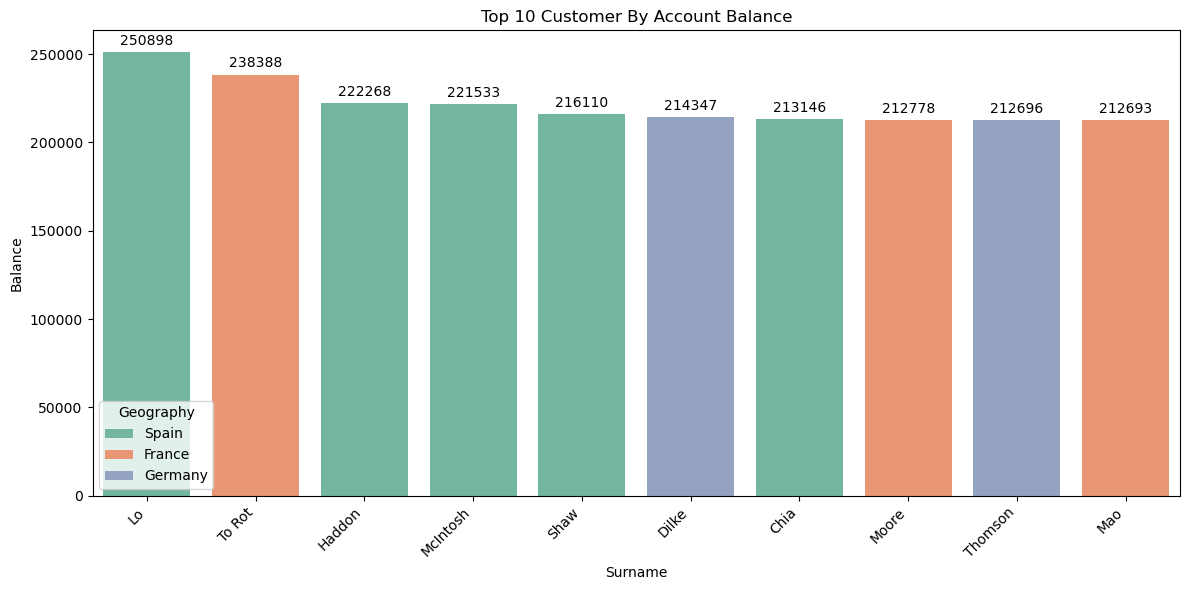

In [34]:
top_balances = merged_df[['Surname', 'Balance', 'Geography']].sort_values(by='Balance', ascending=False).head(10)
# Plot
plt.figure(figsize=(12, 6))
ax = sb.barplot(data=top_balances, x='Surname', y='Balance', hue='Geography', palette='Set2')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Customize plot
plt.title('Top 10 Customer By Account Balance')
plt.xlabel('Surname')
plt.ylabel('Balance')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Geography')
plt.tight_layout()
plt.show()

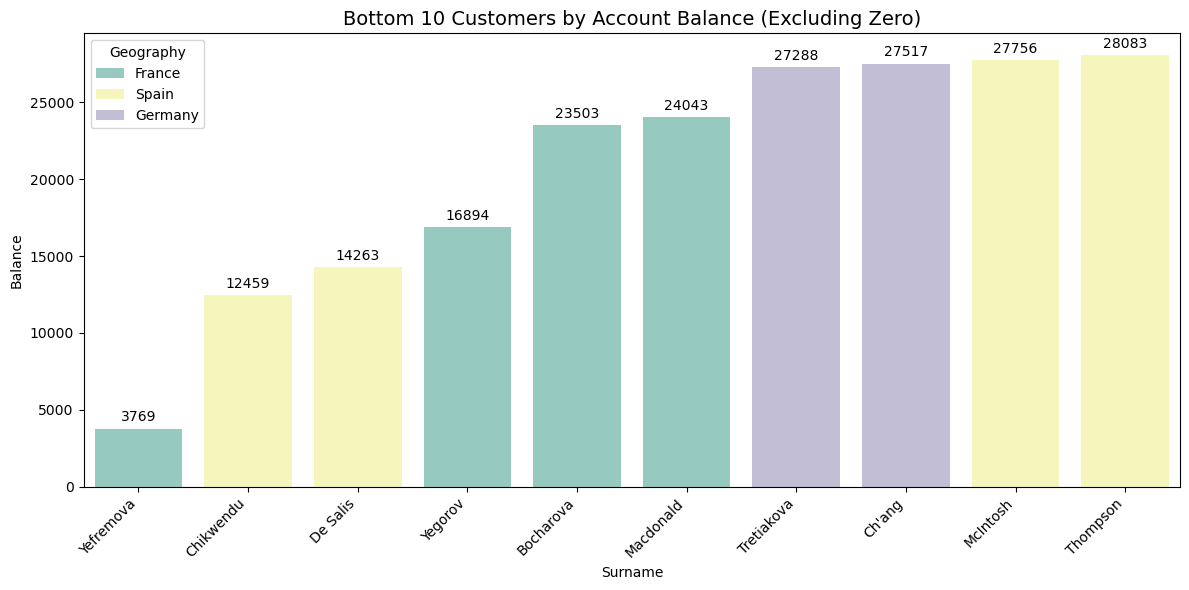

In [18]:
# Filter out zero balances
non_zero_balances = merged_df[merged_df['Balance'] > 0]

# Get bottom 10 balances
bottom_balances = non_zero_balances[['Surname', 'Balance', 'Geography']].sort_values(by='Balance', ascending=True).head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sb.barplot(data=bottom_balances, x='Surname', y='Balance', hue='Geography', palette='Set3')

# Add value labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Customize the chart
plt.title('Bottom 10 Customers by Account Balance (Excluding Zero)', fontsize=14)
plt.xlabel('Surname')
plt.ylabel('Balance')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Geography')
plt.tight_layout()
plt.show()



##### 50% of the top 10 Balance holders are from spain

#### Ratio of Active Members

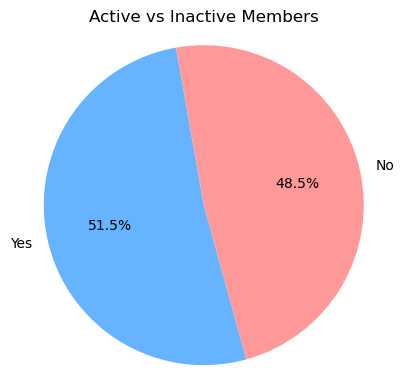

In [38]:

# Count values in 'IsActiveMember' column (column 5)
active_counts = merged_df['IsActiveMember'].value_counts()

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(active_counts, labels=active_counts.index, autopct='%1.1f%%', startangle=100, colors=['#66b3ff', '#ff9999'])

# Customize
plt.title('Active vs Inactive Members')
plt.axis('equal')  # Makes it a perfect circle
plt.tight_layout()
plt.show()


#### What are the numbers for Active and inactive members

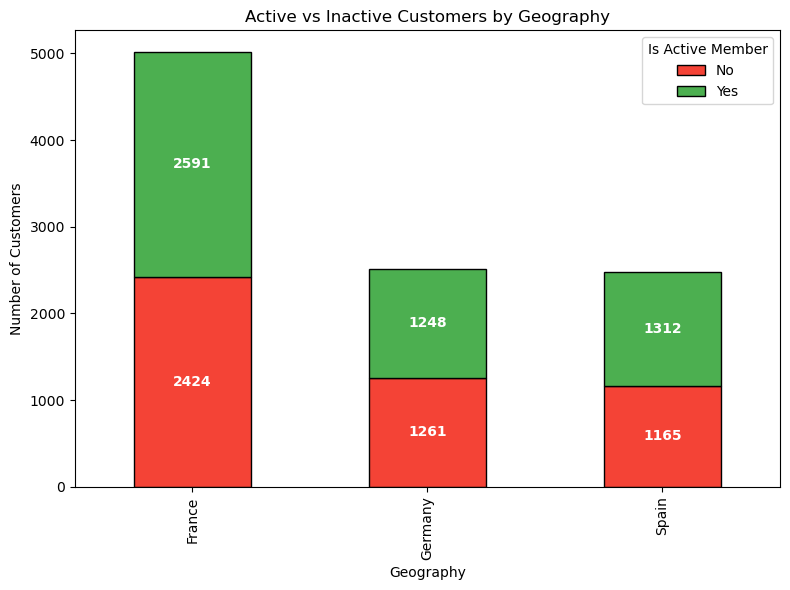

In [40]:
# Group data
grouped = merged_df.groupby(['Geography', 'IsActiveMember'])['CustomerId'].count().unstack().fillna(0)

# Define colors
colors = {'Yes': '#4CAF50', 'No': '#F44336'}  # Green for Yes, Red for No

# Plot
ax = grouped.plot(kind='bar', stacked=True, color=[colors.get(x, '#333') for x in grouped.columns], figsize=(8,6), edgecolor='black')

# Add labels inside bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                int(height),
                ha='center',
                va='center',
                color='white',
                fontsize=10,
                fontweight='bold'
            )

# Labels and title
plt.title('Active vs Inactive Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Is Active Member')
plt.tight_layout()
plt.show()


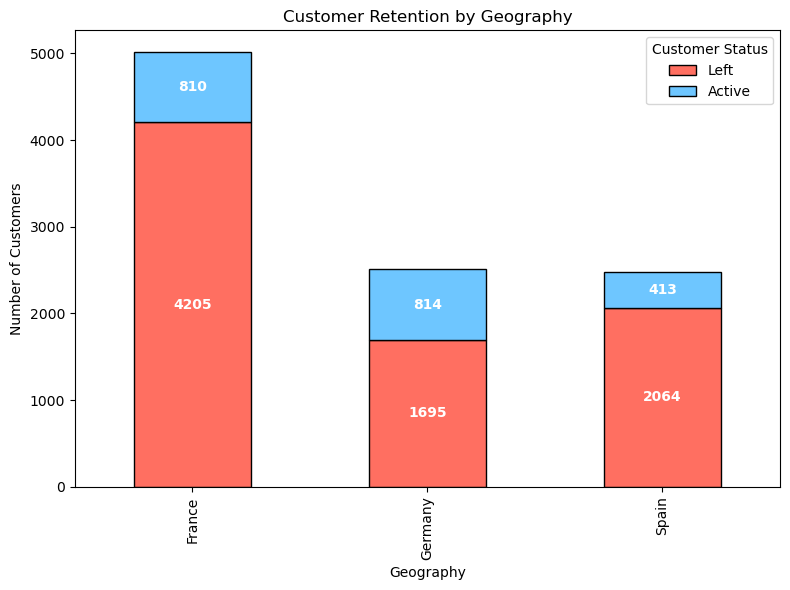

In [42]:
# Group by Geography and Exited status
grouped_exit = merged_df.groupby(['Geography', 'Exited'])['CustomerId'].count().unstack().fillna(0)

# Define clear labels
exit_labels = {0: 'Left', 1: 'Active'}
grouped_exit.columns = [exit_labels.get(col, col) for col in grouped_exit.columns]

# Colors: Red for left, Blue for active
colors = {'Left': '#FF6F61', 'Active': '#6EC6FF'}

# Plot
ax = grouped_exit.plot(
    kind='bar',
    stacked=True,
    color=[colors[col] for col in grouped_exit.columns],
    figsize=(8, 6),
    edgecolor='black'
)

# Add value labels inside the bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                int(height),
                ha='center',
                va='center',
                color='white',
                fontsize=10,
                fontweight='bold'
            )

# Customize chart
plt.title('Customer Retention by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Customer Status')
plt.tight_layout()
plt.show()


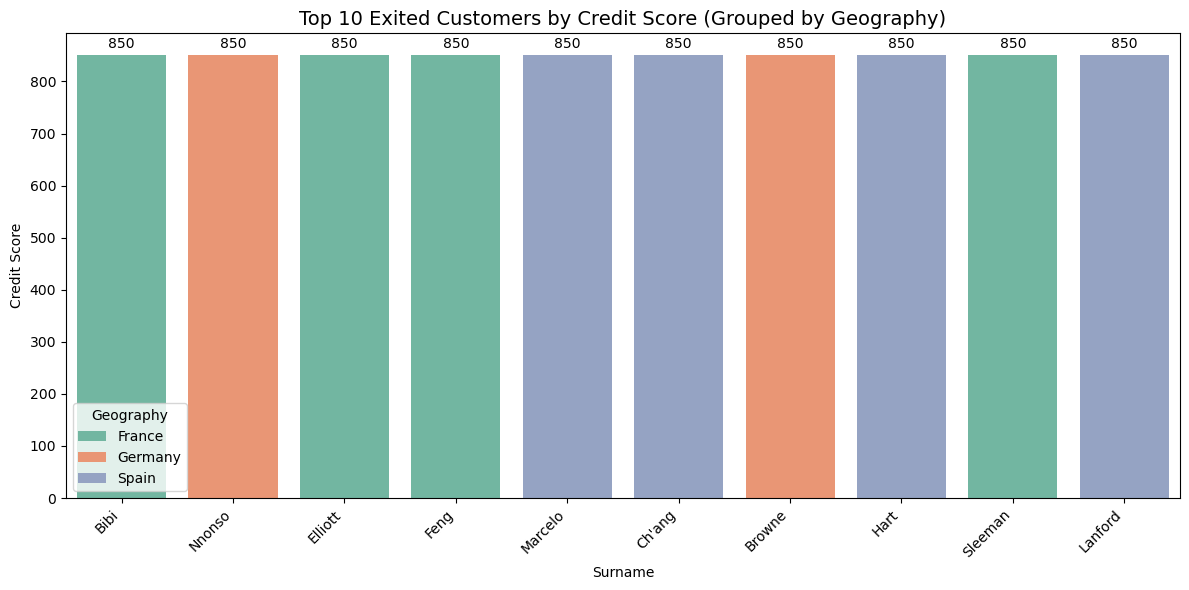

In [24]:
# Filter for exited customers only
exited_customers = merged_df[merged_df['Exited'] == 1]

# Get top 10 by Credit Score
top_credit_scores = exited_customers[['Surname', 'CreditScore', 'Geography']].sort_values(by='CreditScore', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sb.barplot(data=top_credit_scores, x='Surname', y='CreditScore', hue='Geography', palette='Set2')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Customize chart
plt.title('Top 10 Exited Customers by Credit Score (Grouped by Geography)', fontsize=14)
plt.xlabel('Surname')
plt.ylabel('Credit Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Geography')
plt.tight_layout()
plt.show()



In [25]:
# Filter only exited customers
exited_customers = merged_df[merged_df['Exited'] == 1]

# Sort by CreditScore descending
sorted_exited = exited_customers.sort_values(by='CreditScore', ascending=False)

# Select top 10 per Geography
top10_by_geo = sorted_exited.groupby('Geography').head(10)

# Select relevant columns
top10_df = top10_by_geo[['CustomerId', 'Surname', 'Age', 'Balance', 'CreditScore', 'Geography']]

# Display the DataFrame
top10_df


,CustomerId,Surname,Age,Balance,CreditScore,Geography
6741,15733973,Bibi,42.0,0.00,850,France
8548,15778975,Nnonso,70.0,96947.58,850,Germany
4686,15682868,Elliott,40.0,99816.46,850,France
840,15587507,Feng,47.0,0.00,850,France
6081,15717770,Marcelo,55.0,0.00,850,Spain
1638,15607275,Ch'ang,39.0,206014.94,850,Spain
849,15587647,Browne,66.0,127120.62,850,Germany
8686,15782468,Hart,51.0,109799.55,850,Spain
467,15577999,Sleeman,62.0,124678.35,850,France
9379,15800062,Lanford,49.0,0.00,850,Spain


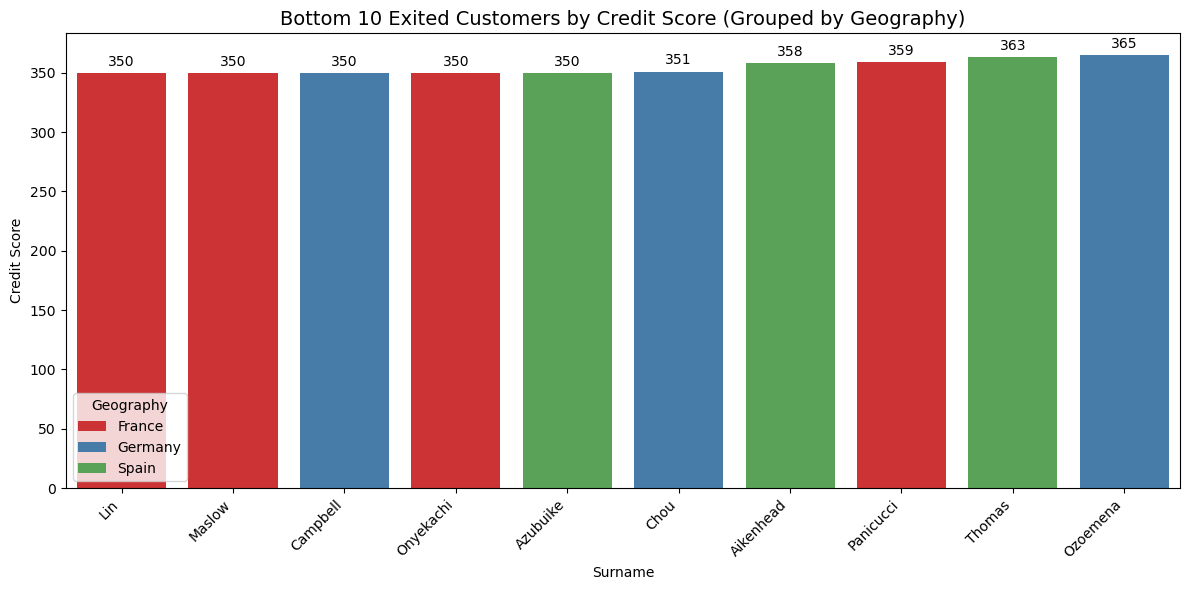

In [27]:
# Filter for exited customers only
exited_customers = merged_df[merged_df['Exited'] == 1]

# Get bottom 10 by Credit Score
bottom_credit_scores = exited_customers[['Surname', 'CreditScore', 'Geography']] \
                        .sort_values(by='CreditScore', ascending=True).head(10)

# Plot
plt.figure(figsize=(12, 6))
ax = sb.barplot(data=bottom_credit_scores, x='Surname', y='CreditScore', hue='Geography', palette='Set1')

# Add data labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Customize chart
plt.title('Bottom 10 Exited Customers by Credit Score (Grouped by Geography)', fontsize=14)
plt.xlabel('Surname')
plt.ylabel('Credit Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Geography')
plt.tight_layout()
plt.show()


In [28]:
# Filter for exited customers only
exited_customers = merged_df[merged_df['Exited'] == 1]

# Sort by Credit Score (ascending) and get bottom 10
bottom_credit_scores_df = exited_customers.sort_values(by='CreditScore', ascending=True).head(10)

# Select relevant columns
bottom_10_df = bottom_credit_scores_df[['CustomerId', 'Surname', 'Age', 'Balance', 'CreditScore', 'Geography']]

# Output the DataFrame
bottom_10_df


,CustomerId,Surname,Age,Balance,CreditScore,Geography
7973,15765173,Lin,60.0,0.00,350,France
4094,15668309,Maslow,40.0,111098.85,350,France
7722,15758813,Campbell,39.0,109733.20,350,Germany
9504,15803202,Onyekachi,51.0,0.00,350,France
4794,15685372,Azubuike,54.0,152677.48,350,Spain
4525,15679249,Chou,57.0,163146.46,351,Germany
5063,15692416,Aikenhead,52.0,143542.36,358,Spain
1850,15612494,Panicucci,44.0,128747.69,359,France
8583,15779947,Thomas,28.0,146098.43,363,Spain
1260,15597896,Ozoemena,30.0,127760.07,365,Germany
